# Coursera Capstone Project

*This notebook will be used used for the capstone project.*

In [62]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
import seaborn as sns
%matplotlib inline

In [3]:
print('Hello Capstone Project Course!')

Hello Capstone Project Course!


First we will load the data and look at the first 5 rows of the dataframe

In [47]:
name = 'Data-Collisions.csv'
df = pd.read_csv(name)
df.head()

/Users/Vincent/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


We will look at the variables in the dataframe

In [18]:
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

We will also look at the SEVERITYCODE variable that we want to predict

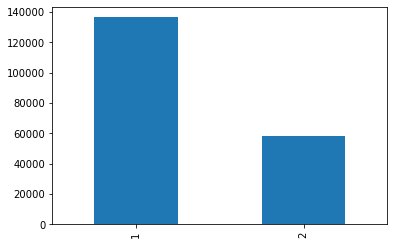

In [64]:
df['SEVERITYCODE'].value_counts().plot(kind = 'bar')
plt.xlabel = 'SEVERITY CODE'

From the plot we can see there are only 2 types in this dataframe:
• 2 — injury
• 1 — prop damage 

In [92]:
features = ['SEVERITYCODE','COLLISIONTYPE','PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'SDOT_COLCODE', 
            'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'PEDROWNOTGRNT',
            'SPEEDING', 'ST_COLCODE', 'HITPARKEDCAR']

In [93]:
df = df[features]
df.head()

,SEVERITYCODE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLCODE,HITPARKEDCAR
0,2,Angles,2,0,0,2,11,0,0,Overcast,Wet,Daylight,0,0,10,0
1,1,Sideswipe,2,0,0,2,16,0,0,Raining,Wet,Dark - Street Lights On,0,0,11,0
2,1,Parked Car,4,0,0,3,14,0,0,Overcast,Dry,Daylight,0,0,32,0
3,1,Other,3,0,0,3,11,0,0,Clear,Dry,Daylight,0,0,23,0
4,2,Angles,2,0,0,2,11,0,0,Raining,Wet,Daylight,0,0,10,0


In [67]:
df['HITPARKEDCAR'].value_counts()

N    187457
Y      7216
Name: HITPARKEDCAR, dtype: int64

In [94]:
df['INATTENTIONIND'].replace(np.nan, 0, inplace = True)
df['INATTENTIONIND'].replace('Y', 1, inplace = True)
df['UNDERINFL'].replace('N', 0, inplace = True)
df['UNDERINFL'].replace(np.nan, 0, inplace = True)
df['UNDERINFL'].replace('Y', 1, inplace = True)
df["UNDERINFL"] = df["UNDERINFL"].astype(str).astype(int)
df['PEDROWNOTGRNT'].replace(np.nan, 0, inplace = True)
df['PEDROWNOTGRNT'].replace('Y', 1, inplace = True)
df['SPEEDING'].replace(np.nan, 0, inplace = True)
df['SPEEDING'].replace('Y', 1, inplace = True)
df['HITPARKEDCAR'].replace('Y', 1, inplace = True)
df['HITPARKEDCAR'].replace('N', 0, inplace = True)


/Users/Vincent/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
<ipython-input-94-8cb15b5b7a3a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["UNDERINFL"] = df["UNDERINFL"].astype(str).astype(int)


In [95]:
df.head()

,SEVERITYCODE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLCODE,HITPARKEDCAR
0,2,Angles,2,0,0,2,11,0,0,Overcast,Wet,Daylight,0,0,10,0
1,1,Sideswipe,2,0,0,2,16,0,0,Raining,Wet,Dark - Street Lights On,0,0,11,0
2,1,Parked Car,4,0,0,3,14,0,0,Overcast,Dry,Daylight,0,0,32,0
3,1,Other,3,0,0,3,11,0,0,Clear,Dry,Daylight,0,0,23,0
4,2,Angles,2,0,0,2,11,0,0,Raining,Wet,Daylight,0,0,10,0


In [100]:
df.isnull().sum()

SEVERITYCODE         0
COLLISIONTYPE     4904
PERSONCOUNT          0
PEDCOUNT             0
PEDCYLCOUNT          0
VEHCOUNT             0
SDOT_COLCODE         0
INATTENTIONIND       0
UNDERINFL            0
WEATHER           5081
ROADCOND          5012
LIGHTCOND         5170
PEDROWNOTGRNT        0
SPEEDING             0
ST_COLCODE          18
HITPARKEDCAR         0
dtype: int64

In [98]:
df[df.isnull().any(axis=1)]

,SEVERITYCODE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLCODE,HITPARKEDCAR
15,1,NaN,1,0,0,0,26,0,0,NaN,NaN,NaN,0,0,,0
36,1,NaN,4,0,0,0,11,0,0,NaN,NaN,NaN,0,0,,0
53,2,NaN,2,0,0,0,11,0,0,NaN,NaN,NaN,0,0,,0
60,1,NaN,2,0,0,0,14,0,0,NaN,NaN,NaN,0,0,,0
75,1,NaN,3,0,0,0,11,0,0,NaN,NaN,NaN,0,0,,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194620,1,NaN,2,0,0,0,14,0,0,NaN,NaN,NaN,0,0,,0
194625,1,NaN,1,0,0,0,26,0,0,NaN,NaN,NaN,0,0,,0
194646,1,NaN,2,0,0,0,14,0,0,NaN,NaN,NaN,0,0,,0
194654,1,NaN,2,0,0,0,11,0,0,NaN,NaN,NaN,0,0,,0


In [114]:
df.dropna(axis = 0,inplace = True)

<ipython-input-114-4c7316b27fb4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(axis = 0,inplace = True)


In [116]:
df.isnull().sum()

SEVERITYCODE      0
COLLISIONTYPE     0
PERSONCOUNT       0
PEDCOUNT          0
PEDCYLCOUNT       0
VEHCOUNT          0
SDOT_COLCODE      0
INATTENTIONIND    0
UNDERINFL         0
WEATHER           0
ROADCOND          0
LIGHTCOND         0
PEDROWNOTGRNT     0
SPEEDING          0
ST_COLCODE        0
HITPARKEDCAR      0
dtype: int64

In [118]:
df.head()

,SEVERITYCODE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLCODE,HITPARKEDCAR
0,2,Angles,2,0,0,2,11,0,0,Overcast,Wet,Daylight,0,0,10,0
1,1,Sideswipe,2,0,0,2,16,0,0,Raining,Wet,Dark - Street Lights On,0,0,11,0
2,1,Parked Car,4,0,0,3,14,0,0,Overcast,Dry,Daylight,0,0,32,0
3,1,Other,3,0,0,3,11,0,0,Clear,Dry,Daylight,0,0,23,0
4,2,Angles,2,0,0,2,11,0,0,Raining,Wet,Daylight,0,0,10,0


In [120]:
df_cat = df[['COLLISIONTYPE', 'WEATHER', 'ROADCOND', 'LIGHTCOND']]
df_cat.head()

,COLLISIONTYPE,WEATHER,ROADCOND,LIGHTCOND
0,Angles,Overcast,Wet,Daylight
1,Sideswipe,Raining,Wet,Dark - Street Lights On
2,Parked Car,Overcast,Dry,Daylight
3,Other,Clear,Dry,Daylight
4,Angles,Raining,Wet,Daylight


In [122]:
dummies = pd.get_dummies(df_cat)

In [125]:
df = pd.concat([df, dummies], axis=1)

In [127]:
df.drop(['COLLISIONTYPE', 'WEATHER', 'ROADCOND', 'LIGHTCOND'], axis = 1, inplace = True)

In [128]:
df.columns

Index(['SEVERITYCODE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT',
       'SDOT_COLCODE', 'INATTENTIONIND', 'UNDERINFL', 'PEDROWNOTGRNT',
       'SPEEDING', 'ST_COLCODE', 'HITPARKEDCAR', 'COLLISIONTYPE_Angles',
       'COLLISIONTYPE_Cycles', 'COLLISIONTYPE_Head On',
       'COLLISIONTYPE_Left Turn', 'COLLISIONTYPE_Other',
       'COLLISIONTYPE_Parked Car', 'COLLISIONTYPE_Pedestrian',
       'COLLISIONTYPE_Rear Ended', 'COLLISIONTYPE_Right Turn',
       'COLLISIONTYPE_Sideswipe', 'WEATHER_Blowing Sand/Dirt', 'WEATHER_Clear',
       'WEATHER_Fog/Smog/Smoke', 'WEATHER_Other', 'WEATHER_Overcast',
       'WEATHER_Partly Cloudy', 'WEATHER_Raining', 'WEATHER_Severe Crosswind',
       'WEATHER_Sleet/Hail/Freezing Rain', 'WEATHER_Snowing',
       'WEATHER_Unknown', 'ROADCOND_Dry', 'ROADCOND_Ice', 'ROADCOND_Oil',
       'ROADCOND_Other', 'ROADCOND_Sand/Mud/Dirt', 'ROADCOND_Snow/Slush',
       'ROADCOND_Standing Water', 'ROADCOND_Unknown', 'ROADCOND_Wet',
       'LIGHTCOND_Dark - No Str

In [129]:
df.head()

,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,INATTENTIONIND,UNDERINFL,PEDROWNOTGRNT,SPEEDING,...,ROADCOND_Wet,LIGHTCOND_Dark - No Street Lights,LIGHTCOND_Dark - Street Lights Off,LIGHTCOND_Dark - Street Lights On,LIGHTCOND_Dark - Unknown Lighting,LIGHTCOND_Dawn,LIGHTCOND_Daylight,LIGHTCOND_Dusk,LIGHTCOND_Other,LIGHTCOND_Unknown
0,2,2,0,0,2,11,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,1,2,0,0,2,16,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
2,1,4,0,0,3,14,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,3,0,0,3,11,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,2,2,0,0,2,11,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0


In [130]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [131]:
X = df.values.astype(float)
y = df['SEVERITYCODE'].values

In [132]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

In [133]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=0)


In [138]:
k = 5
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier()

In [139]:
yhat = neigh.predict(X_test)

In [141]:
yhat[0:5]

array([1, 1, 1, 1, 1])

In [142]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.9927709570558628
Test set Accuracy:  0.9889250814332248


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

In [ ]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [135]:
df.head()

,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,INATTENTIONIND,UNDERINFL,PEDROWNOTGRNT,SPEEDING,...,ROADCOND_Wet,LIGHTCOND_Dark - No Street Lights,LIGHTCOND_Dark - Street Lights Off,LIGHTCOND_Dark - Street Lights On,LIGHTCOND_Dark - Unknown Lighting,LIGHTCOND_Dawn,LIGHTCOND_Daylight,LIGHTCOND_Dusk,LIGHTCOND_Other,LIGHTCOND_Unknown
0,2,2,0,0,2,11,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,1,2,0,0,2,16,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
2,1,4,0,0,3,14,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,3,0,0,3,11,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,2,2,0,0,2,11,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
